### Image Classification    

In [ ]:
##Open CV

In [ ]:
import numpy as np
import cv2

# Image Classifcation
Plant disease corn,maize,tomato

In [ ]:
#importing Librararies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
#from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

C:\Users\ASIM\AppData\Local\Temp\ipykernel_17984\1020505227.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


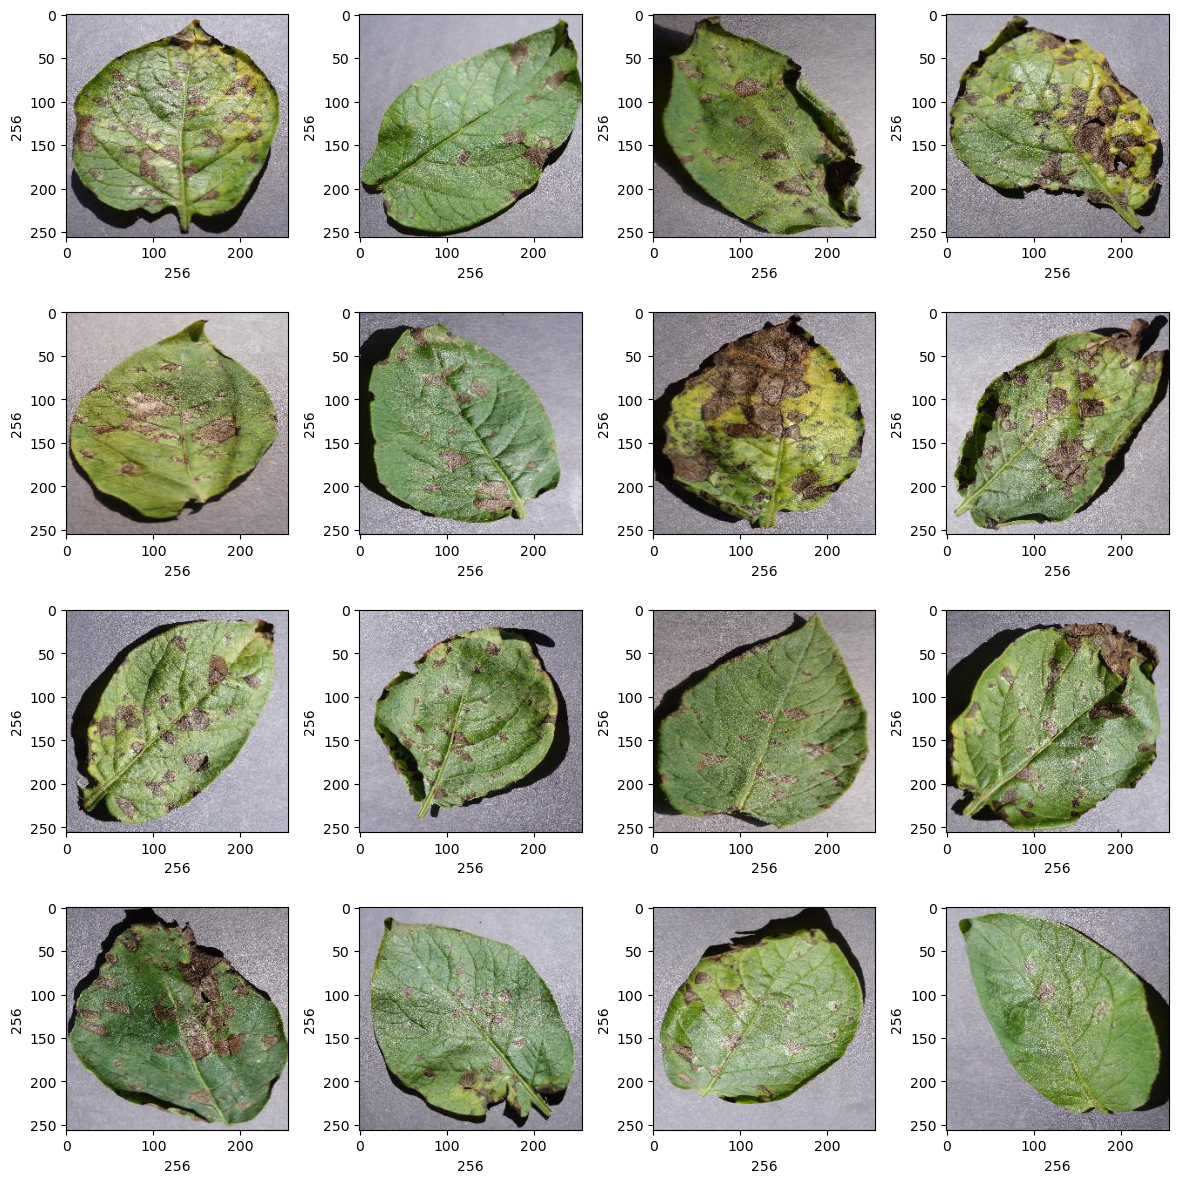

In [ ]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "Data/Plant_images/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [ ]:
#Converting Images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
dir = "Data/Plant_images"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [ ]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
Name: count, dtype: int64

In [ ]:
image_list[0].shape

(256, 256, 3)

In [ ]:
label_list = np.array(label_list)
label_list.shape

(900,)

In [ ]:
#splitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [ ]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

<img src="c1.png" width="750" align="center">

<img src="c2.gif" width="750" align="center">

<img src="c3.gif" width="750" align="center">

Next we will create a network architecture for the model. We have used different types of layers according to their features namely Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel).


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [ ]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [ ]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 31s 4s/step - loss: 1.0763 - accuracy: 0.5451 - val_loss: 0.9979 - val_accuracy: 0.8681
Epoch 2/50
5/5 [==============================] - 24s 5s/step - loss: 0.9591 - accuracy: 0.9028 - val_loss: 0.8825 - val_accuracy: 0.9236
Epoch 3/50
5/5 [==============================] - 118s 28s/step - loss: 0.8327 - accuracy: 0.8281 - val_loss: 0.7562 - val_accuracy: 0.8681
Epoch 4/50
5/5 [==============================] - 27s 4s/step - loss: 0.6989 - accuracy: 0.8785 - val_loss: 0.6129 - val_accuracy: 0.9583
Epoch 5/50
5/5 [==============================] - 20s 4s/step - loss: 0.5599 - accuracy: 0.9792 - val_loss: 0.4796 - val_accuracy: 0.9653
Epoch 6/50
5/5 [==============================] - 25s 5s/step - loss: 0.4318 - accuracy: 0.9826 - val_loss: 0.3676 - val_accuracy: 0.9722
Epoch 7/50
5/5 [==============================] - 23s 4s/step - loss: 0.3232 - accuracy: 0.9844 - val_loss: 0.2788 - val_accuracy: 0.9792
Epoch 8/50
5/5 [================

In [ ]:
#saving the weights of the model
model.save_weights('plant_model_weights.h5')

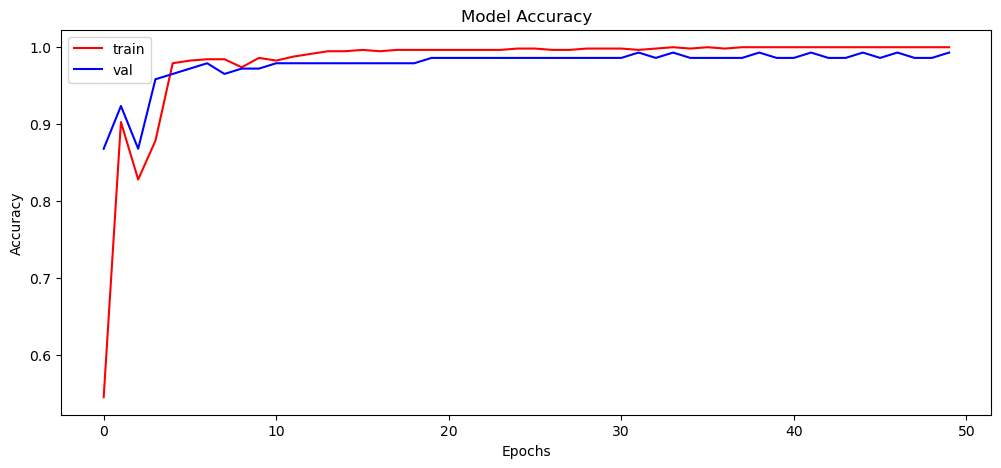

In [ ]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 1s 214ms/step - loss: 0.0340 - accuracy: 0.9833
Test Accuracy: 98.33333492279053


In [ ]:
y_pred = model.predict(x_test)

6/6 [==============================] - 2s 218ms/step


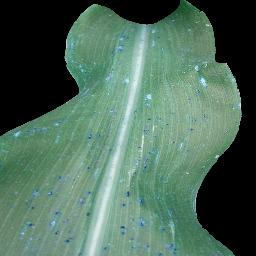

In [ ]:
# Plotting image to compare
#from tensorflow.keras.preprocessing.image import array_to_image
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array

img = array_to_img(x_test[14])
img

In [ ]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[14])])
print("Predicted : ",all_labels[np.argmax(y_pred[14])])

Originally :  Corn-Common_rust
Predicted :  Corn-Common_rust
